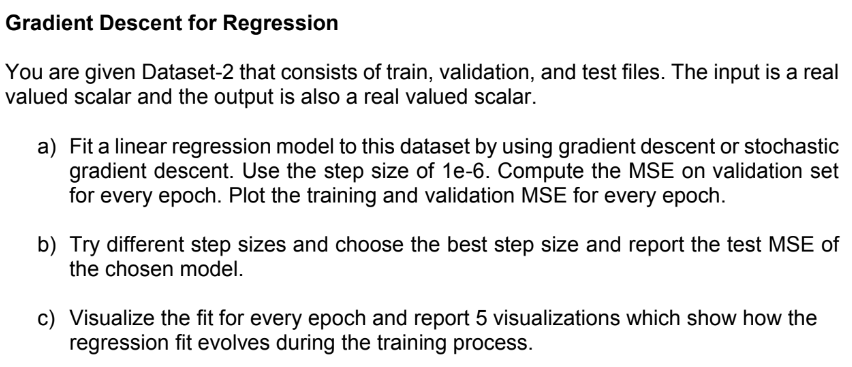

In [117]:
!pwd

/content


In [118]:
!ls

drive  sample_data


In [119]:
!cd drive

In [120]:
!pwd

/content


In [121]:
# /content/drive/MyDrive/Dataset_2_test_canada.csv
# /content/drive/MyDrive/Dataset_2_train_canada.csv
# /content/drive/MyDrive/Dataset_2_valid_canada.csv

In [122]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
# Reading the datasets

df_train = pd.read_csv(r"/content/drive/MyDrive/Dataset_2_train_canada.csv")
df_valid = pd.read_csv(r"/content/drive/MyDrive/Dataset_2_valid_canada.csv")
df_test = pd.read_csv(r"/content/drive/MyDrive/Dataset_2_test_canada.csv")

# *Question 1*

## Setting up Data


Train Dataset

In [124]:

df_train.head()

,1.1343615213,8.75521779949,Unnamed: 2
0,0.628288,6.080669,NaN
1,0.914297,7.154124,NaN
2,0.795270,6.725596,NaN
3,1.386819,9.262608,NaN
4,0.051061,3.583539,NaN


In [125]:
df_train.shape

(299, 3)

In [126]:
df_train.columns

Index(['1.1343615213', '8.75521779949', 'Unnamed: 2'], dtype='object')

In [127]:
del_col = df_train.columns[2]
del_col

'Unnamed: 2'

In [128]:
df_train.drop(columns=[del_col],inplace=True)

In [129]:
df_train.head()

,1.1343615213,8.75521779949
0,0.628288,6.080669
1,0.914297,7.154124
2,0.795270,6.725596
3,1.386819,9.262608
4,0.051061,3.583539


In [130]:
df_train.rename(columns = {df_train.columns[0]:"input", df_train.columns[1]:"output"},inplace=True)
df_train.head()

,input,output
0,0.628288,6.080669
1,0.914297,7.154124
2,0.795270,6.725596
3,1.386819,9.262608
4,0.051061,3.583539


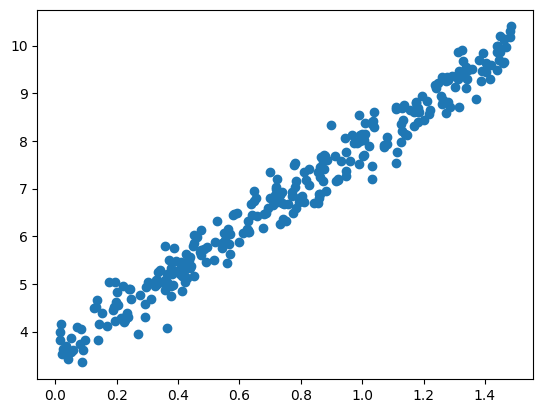

In [131]:
plt.title("Variation of output with input")
plt.xlabel("input")
plt.ylabel("output")
plt.scatter(df_train['input'], df_train['output'])
plt.show()

In [132]:
df_train.shape

(299, 2)

In [133]:
y_train = np.array(df_train['output'])
X_train = df_train.iloc[:,:-1]

Validation Dataset

In [134]:
df_valid.head()

,0.285946632312,5.06873885044,Unnamed: 2
0,1.115251,8.439574,NaN
1,0.687795,6.351955,NaN
2,0.234410,4.190641,NaN
3,0.501254,5.469572,NaN
4,1.028147,7.697516,NaN


In [135]:
df_valid.shape

(99, 3)

In [136]:
df_valid.columns

Index(['0.285946632312', '5.06873885044', 'Unnamed: 2'], dtype='object')

In [137]:
del_col = df_valid.columns[2]
del_col

'Unnamed: 2'

In [138]:
df_valid.drop(columns=[del_col],inplace=True)

In [139]:
df_valid.head()

,0.285946632312,5.06873885044
0,1.115251,8.439574
1,0.687795,6.351955
2,0.234410,4.190641
3,0.501254,5.469572
4,1.028147,7.697516


In [140]:
df_valid.rename(columns = {df_valid.columns[0]:"input", df_valid.columns[1]:"output"},inplace=True)
df_valid.head()

,input,output
0,1.115251,8.439574
1,0.687795,6.351955
2,0.234410,4.190641
3,0.501254,5.469572
4,1.028147,7.697516


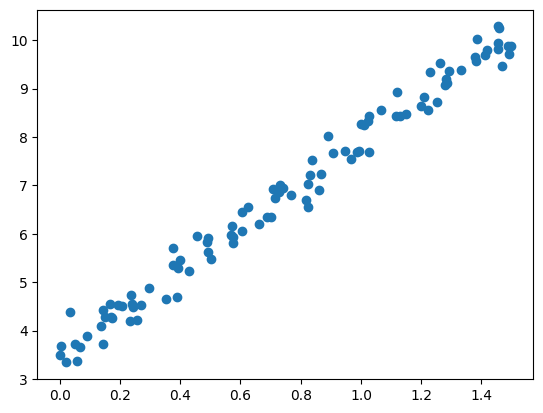

In [141]:
plt.title("Variation of output with input")
plt.xlabel("input")
plt.ylabel("output")
plt.scatter(df_valid['input'], df_valid['output'])
plt.show()

In [142]:
df_valid.shape

(99, 2)

In [143]:
y_valid = np.array(df_valid['output'])
X_valid = df_valid.iloc[:,:-1]

Test Dataset

In [144]:
df_test.head()

,0.239309719927,4.48901037639,Unnamed: 2
0,0.445363,5.368121,NaN
1,0.156010,4.331304,NaN
2,0.377953,5.489789,NaN
3,0.669091,6.655457,NaN
4,0.598022,6.458847,NaN


In [145]:
df_test.shape

(99, 3)

In [146]:
df_test.columns

Index(['0.239309719927', '4.48901037639', 'Unnamed: 2'], dtype='object')

In [147]:
del_col = df_test.columns[2]
del_col

'Unnamed: 2'

In [148]:
df_test.drop(columns=[del_col],inplace=True)

In [149]:
df_test.head()

,0.239309719927,4.48901037639
0,0.445363,5.368121
1,0.156010,4.331304
2,0.377953,5.489789
3,0.669091,6.655457
4,0.598022,6.458847


In [150]:
df_test.rename(columns = {df_test.columns[0]:"input", df_test.columns[1]:"output"},inplace=True)
df_test.head()

,input,output
0,0.445363,5.368121
1,0.156010,4.331304
2,0.377953,5.489789
3,0.669091,6.655457
4,0.598022,6.458847


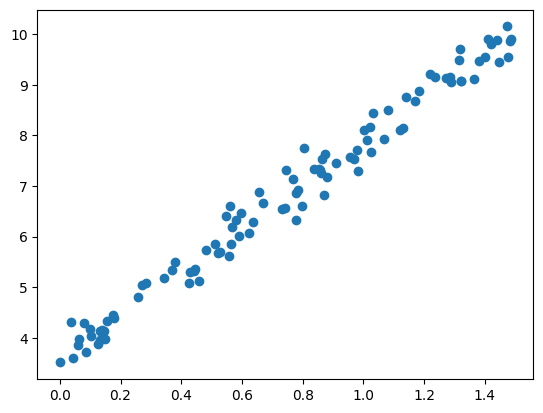

In [151]:
plt.title("Variation of output with input")
plt.xlabel("input")
plt.ylabel("output")
plt.scatter(df_test['input'], df_test['output'])
plt.show()

In [152]:
df_test.shape

(99, 2)

In [153]:
# Dividing the dataset into X and y
y_test = np.array(df_test['output'])
X_test = df_test.iloc[:,:-1]

## Applying Gradient to Regression

In [154]:
# Defining required functions for gradient descent

def linear_regression(X, w, b):
  return np.dot(X,w) + b

def MSE(y, y_pred):
  return np.mean(np.square(y_pred-y))

def w_grad(x_train, y, y_pred):
  return 2*np.dot(X_train.T, (y_pred - y))/len(X_train)

def b_grad(x, y, y_pred):
  return 2*np.mean(y_pred-y)

def gradient_descent(alpha, n_epochs, w, b):

  MSEs_train = []
  MSEs_valid = []
  MSEs_test = []

  w_history = []
  b_history = []

  y_train_pred = linear_regression(X_train, w, b)

  for e in range(n_epochs):

    w = w - alpha * w_grad(X_train, y_train, y_train_pred)
    b = b - alpha * b_grad(X_train, y_train, y_train_pred)

    w_history.append(w)
    b_history.append(b)

    y_train_pred = linear_regression(X_train, w, b)
    y_valid_pred = linear_regression(X_valid, w, b)
    y_test_pred = linear_regression(X_test, w, b)

    MSE_train = MSE(y_train, y_train_pred)
    MSE_valid = MSE(y_valid, y_valid_pred)
    MSE_test = MSE(y_test, y_test_pred)

    MSEs_train.append(MSE_train)
    MSEs_valid.append(MSE_valid)
    MSEs_test.append(MSE_test)


  return w, b, MSEs_train, MSEs_valid, MSEs_test, w_history, b_history


In [155]:
# checking the training with alpha value 1e-6

alpha = 1e-6
n_epochs = 1000000
w = np.random.rand(X_train.shape[1])
b = 0

w, b, MSEs_train, MSEs_valid, MSEs_test, w_history, b_history = gradient_descent(alpha, n_epochs, w, b)

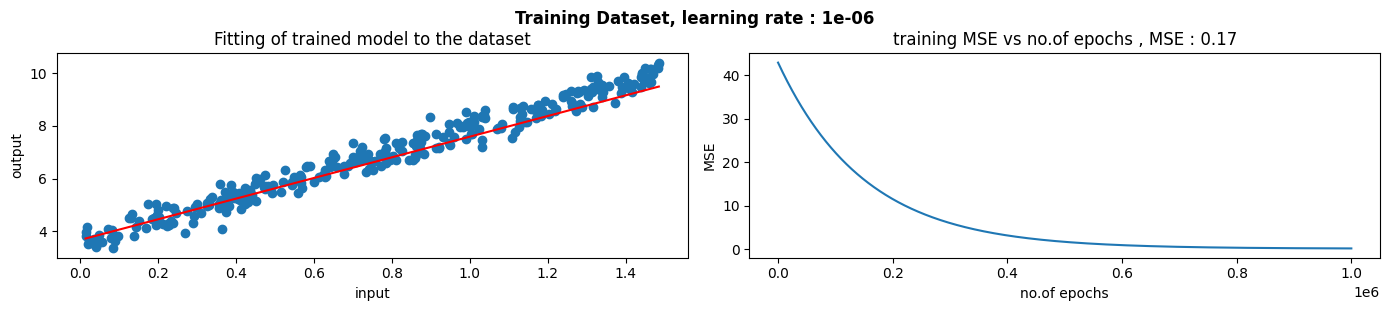

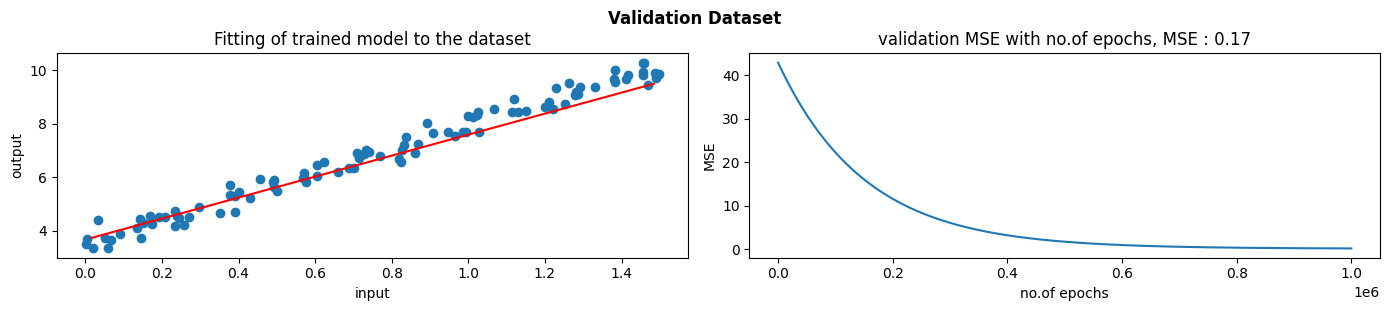

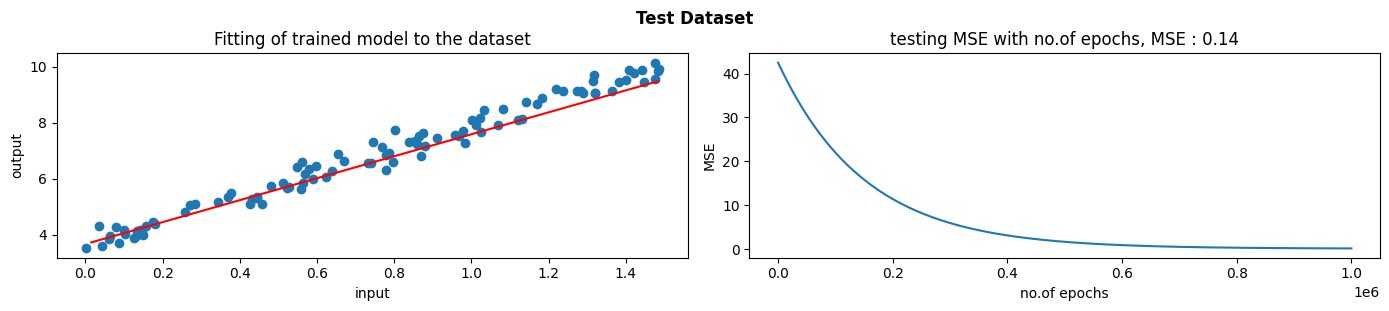

In [156]:
# plotting the graphs with for given alpha for all datasets
x_axis = np.linspace(np.min(X_train.iloc[:,0]),np.max(X_train.iloc[:,0]), 1000)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,3))
fig.text(0.5, 0.99, f'Training Dataset, learning rate : {alpha}', ha = 'center', va = 'center', fontsize = 12, fontweight = 'bold')
axes[0].set_title(f"Fitting of trained model to the dataset")
axes[0].plot(x_axis, w*x_axis + b, color = 'red')
axes[0].scatter(X_train.iloc[:,0], y_train)
axes[0].set_xlabel("input")
axes[0].set_ylabel("output")
axes[1].set_title(f"training MSE vs no.of epochs , MSE : {np.round(MSEs_train[-1],2)}")
axes[1].plot(MSEs_train)
axes[1].set_xlabel("no.of epochs")
axes[1].set_ylabel("MSE")
plt.tight_layout()

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,3))
fig.text(0.5, 0.99, 'Validation Dataset', ha = 'center', va = 'center', fontsize = 12, fontweight = 'bold')
axes[0].set_title(f"Fitting of trained model to the dataset")
axes[0].plot(x_axis, w*x_axis + b, color = 'red')
axes[0].scatter(X_valid.iloc[:,0], y_valid)
axes[0].set_xlabel("input")
axes[0].set_ylabel("output")

axes[1].set_title(f"validation MSE with no.of epochs, MSE : {np.round(MSEs_valid[-1],2)}")
axes[1].plot(MSEs_valid)
axes[1].set_xlabel("no.of epochs")
axes[1].set_ylabel("MSE")
plt.tight_layout()

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,3))
fig.text(0.5, 0.99, 'Test Dataset', ha = 'center', va = 'center', fontsize = 12, fontweight = 'bold')
axes[0].set_title(f"Fitting of trained model to the dataset")
axes[0].plot(x_axis, w*x_axis + b, color = 'red')
axes[0].scatter(X_test.iloc[:,0], y_test)
axes[0].set_xlabel("input")
axes[0].set_ylabel("output")

axes[1].set_title(f"testing MSE with no.of epochs, MSE : {np.round(MSEs_test[-1],2)}")
axes[1].plot(MSEs_test)
axes[1].set_xlabel("no.of epochs")
axes[1].set_ylabel("MSE")
plt.tight_layout()


Testing error is lesser compared to training error indicates overshoot because of too many no.of iterations. So different combinations of (n_epochs , alpha ) should be experimented


# *Question 2*

In [157]:
# taking set of alphas and find which alpha is better

alphas = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
best_MSE_test = float('inf')
best_alpha = 0
best_w_history = []
best_b_history = []

for alpha in alphas:

  n_epochs = 10000
  w = np.random.rand(X_train.shape[1])
  b = 0

  w, b, MSEs_train, MSEs_valid, MSEs_test, w_history, b_history = gradient_descent(alpha, n_epochs, w, b)

  MSE_test = MSEs_test[-1]

  if MSE_test < best_MSE_test:
    best_alpha = alpha
    best_MSE_test = MSE_test
    best_w_history = w_history
    best_b_history = b_history

print(f"best alpha is : {best_alpha} with MSE : {best_MSE_test}")

best alpha is : 0.001 with MSE : 0.06942393799736966


# *Question 3*

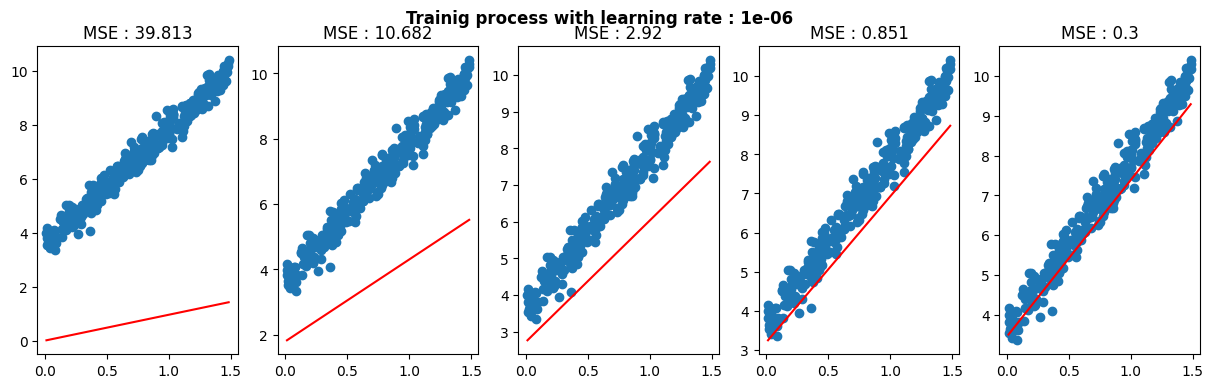

In [158]:
# for the same alpha, plotting the training dataset fitting curve
alpha = 1e-6
n_epochs = 1000000
w = np.random.rand(X_train.shape[1])
b = 0

w, b, MSEs_train, MSEs_valid, MSEs_test, w_history, b_history = gradient_descent(alpha, n_epochs, w, b)

interval = n_epochs//5
five_ws = w_history[::interval]
five_bs = b_history[::interval]
MSEs = MSEs_train[::interval]
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize=(15,4))
fig.text(0.5, 0.95, f"Trainig process with learning rate : {alpha}", ha = 'center', va = 'center', fontsize = 12, fontweight = 'bold')

for i in range(5):
  axes[i].set_title(f"MSE : {np.round(MSEs[i],3)}")
  axes[i].scatter(X_train.iloc[:,0], y_train)
  axes[i].plot(x_axis, five_ws[i]*x_axis+ five_bs[i], color = 'red')